# **Iris Flower Classification: A Comparison of KNN, SVM, and Logistic Regression**

## **1. Introduction**
The **Iris dataset** is one of the most well-known datasets in the field of machine learning and is widely used for classification tasks. It contains data about the physical characteristics of three species of Iris flowers: **Setosa**, **Versicolor**, and **Virginica**. The objective is to classify each flower based on four features: sepal length, sepal width, petal length, and petal width. This dataset has 150 samples, with each sample belonging to one of three species.

The goal of this notebook is to explore and compare the performance of three classification algorithms: **K-Nearest Neighbors (KNN)**, **Support Vector Machine (SVM)**, and **Logistic Regression**.

We will evaluate the models using accuracy, precision, recall, and F1-score metrics to determine which model performs the best.

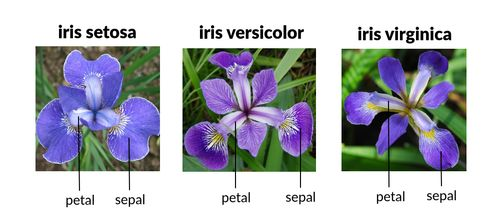

In [63]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

## **2. Dataset Overview**
- **Number of Samples:** 150
- **Number of Features:** 4
  - Sepal length
  - Sepal width
  - Petal length
  - Petal width
- **Target Classes:** 3 species
  - **Setosa**
  - **Versicolor**
  - **Virginica**
  
### **Dataset Properties**
The dataset is a multivariate dataset with continuous features (sepal and petal measurements). It is often considered a "toy" dataset because it is small and relatively simple, making it ideal for initial experimentation and model comparison.

In [2]:
!unzip /content/iris.zip

Archive:  /content/iris.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


In [6]:
# Load the Iris dataset from sklearn
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data['target'] = iris.target

In [7]:
# Display the first few rows of the dataframe
print(iris_data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [10]:
# Explore the data
print(iris_data.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [11]:
print(iris_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [13]:
#Distribution of target variable
print("\nDistribution of target variable:")
print(iris_data['target'].value_counts())


Distribution of target variable:
target
0    50
1    50
2    50
Name: count, dtype: int64


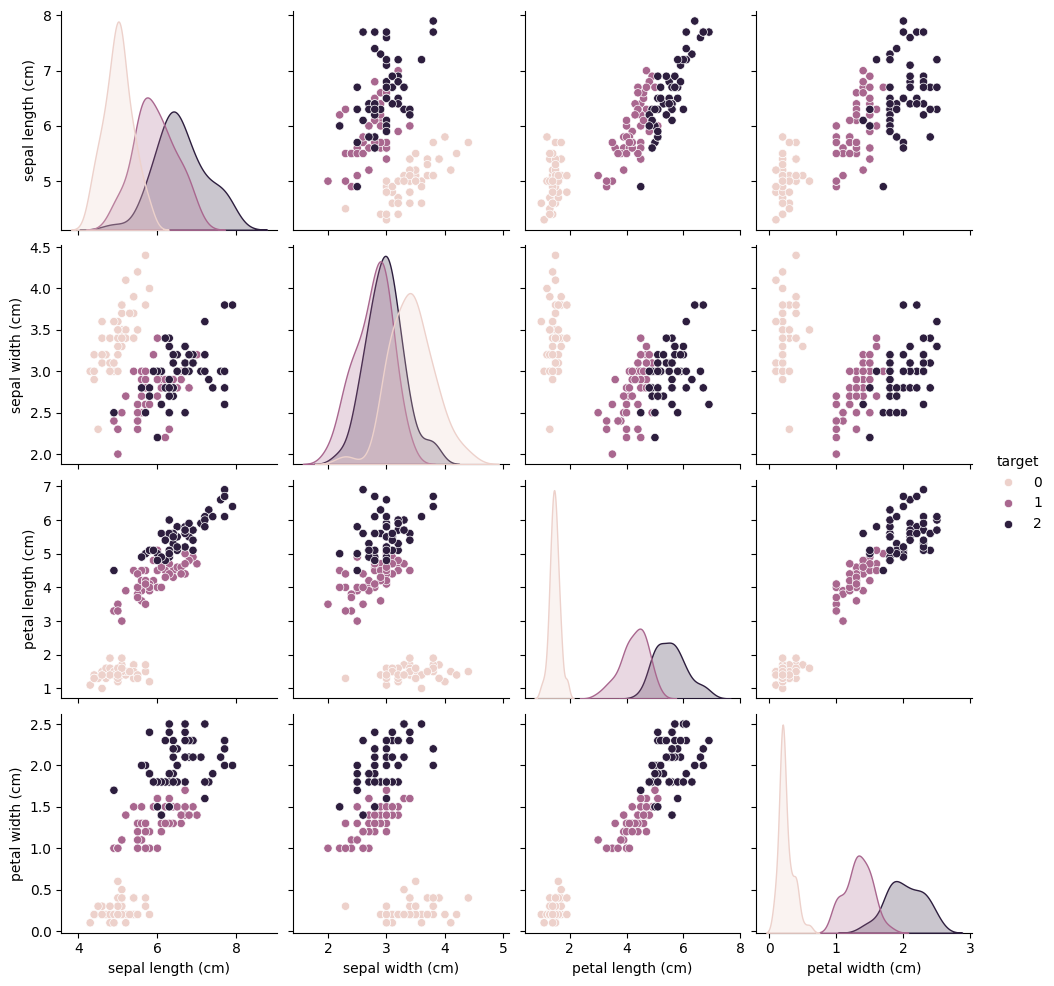

In [12]:
# Visualize the data
sns.pairplot(iris_data, hue='target')
plt.show()


Boxplot of features:


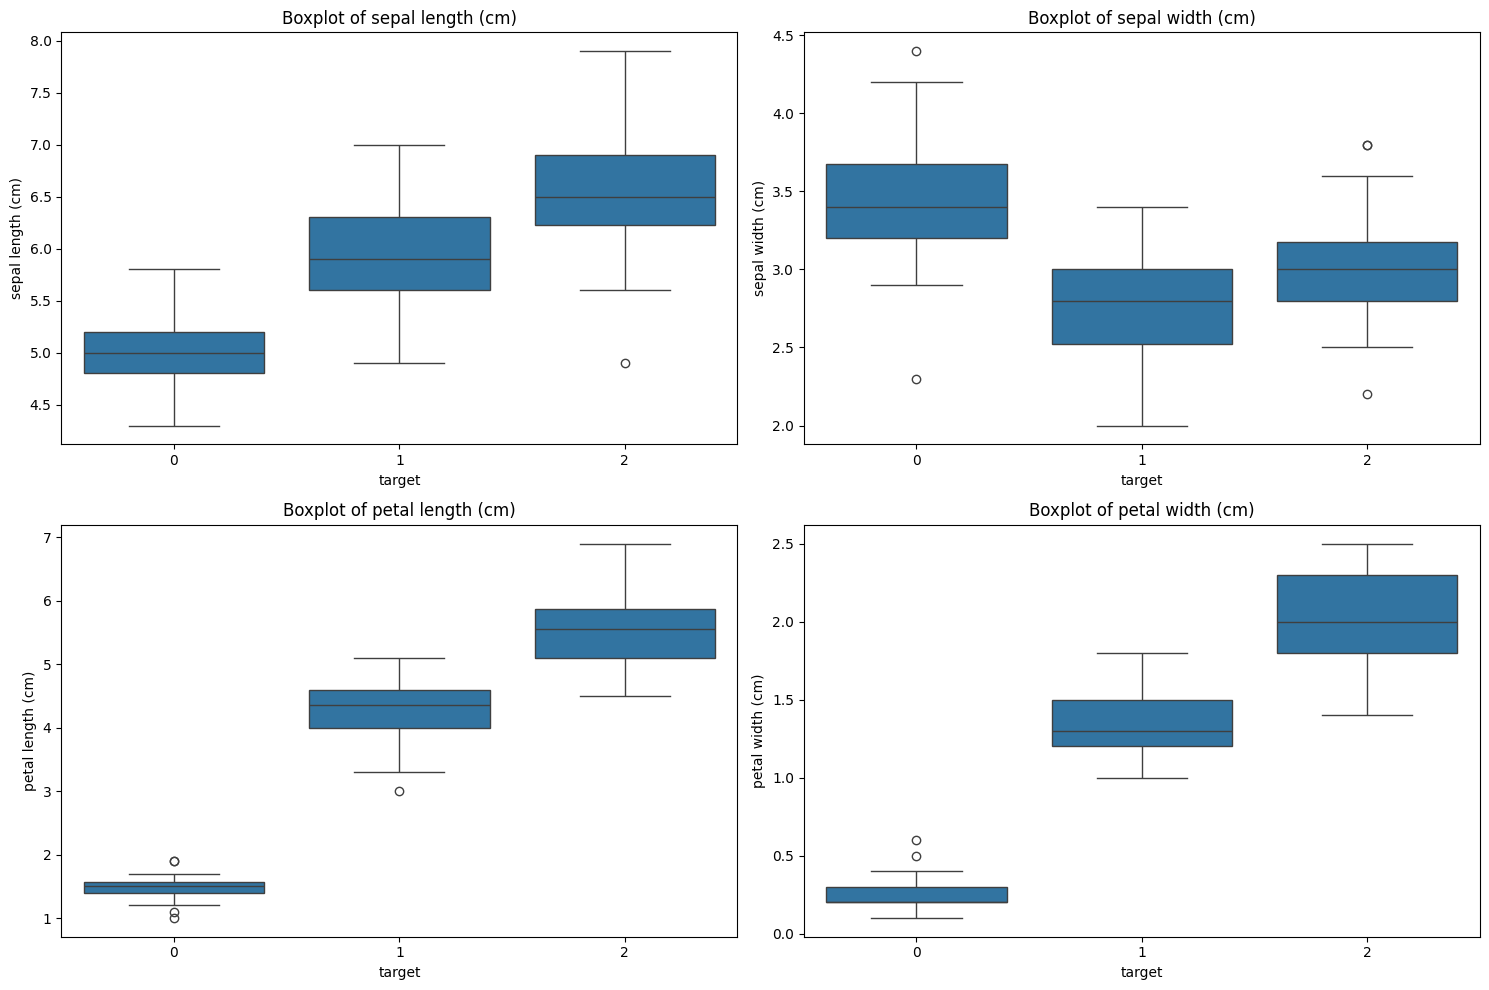

In [14]:
#Boxplot of features
print("\nBoxplot of features:")
plt.figure(figsize=(15, 10))
for i, column in enumerate(iris_data.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='target', y=column, data=iris_data)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


Heatmap of correlation matrix:


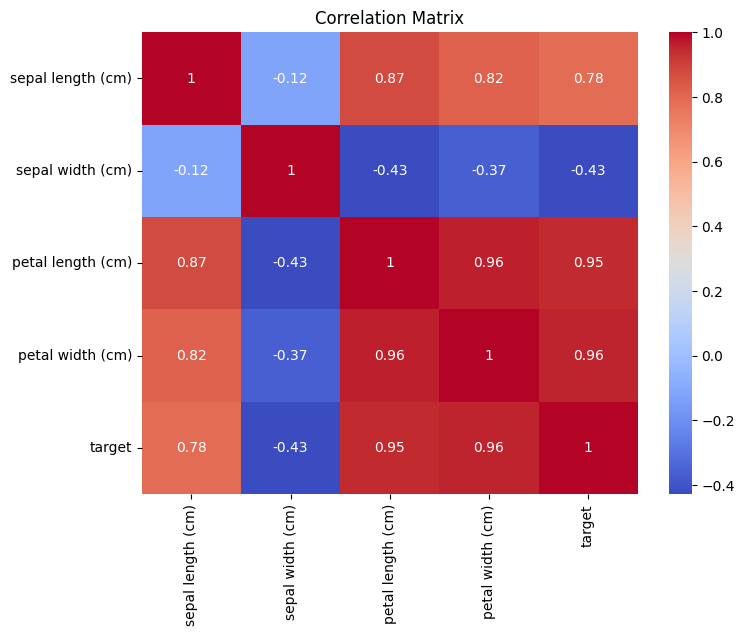

In [15]:
#Heatmap of correlation matrix
print("\nHeatmap of correlation matrix:")
plt.figure(figsize=(8,6))
sns.heatmap(iris_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## **3. Data Preprocessing**
### **Loading the Dataset**
The dataset is loaded directly from the **Scikit-learn** library, which provides a built-in version of the Iris dataset. The features (`X`) and target labels (`y`) are separated.

In [16]:
# Split the data into features (X) and target (y)
X = iris_data.drop('target', axis=1)
y = iris_data['target']

### **Splitting the Data**
We split the dataset into **training** and **testing** sets using the **train_test_split** function. The training set consists of 80% of the data, and the testing set contains 20%. This split ensures that the model is trained on one subset and evaluated on another, giving an unbiased performance estimate.

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Standardization**
For some models like **SVM** and **KNN**, it is crucial to scale the data to bring all features to a similar range. We use **StandardScaler** to standardize the dataset, which removes the mean and scales the features to unit variance

In [18]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **4. Model Training and Evaluation**
### **K-Nearest Neighbors (KNN)**
The **K-Nearest Neighbors (KNN)** algorithm is a non-parametric, instance-based learning method. It classifies a new sample based on the majority class of its k nearest neighbors. In this experiment, we use k=3, which means each sample is classified based on the closest three neighbors.
#### Training KNN:

In [19]:
# Choose the number of neighbors (k)
k = 5

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=k)

In [20]:
# Train the classifier on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
# Make predictions on the testing data
y_pred_knn = knn.predict(X_test)

### **Support Vector Machine (SVM)**
The **Support Vector Machine (SVM)** is a powerful classification algorithm that constructs hyperplanes in a high-dimensional space to separate different classes. It is effective for both linearly separable and non-linearly separable data, especially with the use of kernel functions.

#### Training SVM:

In [24]:
# Create an SVM classifier
svm = SVC(kernel='linear', random_state=42)

In [25]:
# Train the classifier on the training data
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [48]:
# Make predictions on the testing data
y_pred_svm = svm.predict(X_test)

### **Logistic Regression**
**Logistic Regression** is a linear model used for binary and multiclass classification. Despite its name, it is used for classification tasks. It applies the logistic function to model the probability of a sample belonging to a certain class.

#### Training Logistic Regression:

In [64]:
# Create a Logistic Regression classifier
logreg = LogisticRegression(random_state=42, max_iter=1000)

In [65]:
# Train the classifier on the training data
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [66]:
# Make predictions on the testing data
y_pred_logreg = logreg.predict(X_test)

## **5. Results and Performance Metrics**
We evaluate each model's performance using common classification metrics:
- **Precision:** The proportion of true positive predictions among all positive predictions.
- **Recall:** The proportion of true positive predictions among all actual positives.
- **F1-Score:** The harmonic mean of precision and recall.
- **Accuracy:** The proportion of correct predictions out of all predictions.

In [54]:
# --- Visualization of performance ---
# Function to visualize confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=iris.target_names, yticklabels=iris.target_names)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title(title)
  plt.show()

In [ ]:
# Function to visualize classification report
def display_classification_report(y_true, y_pred, title):
  print(f"\n{title}:\n")
  print(classification_report(y_true, y_pred, target_names=iris.target_names))

display_classification_report(y_test, y_pred_knn, 'KNN Classification Report')  # Now display_classification_report is defined

In [61]:
display_classification_report(y_test, y_pred_knn, 'KNN Classification Report')


KNN Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



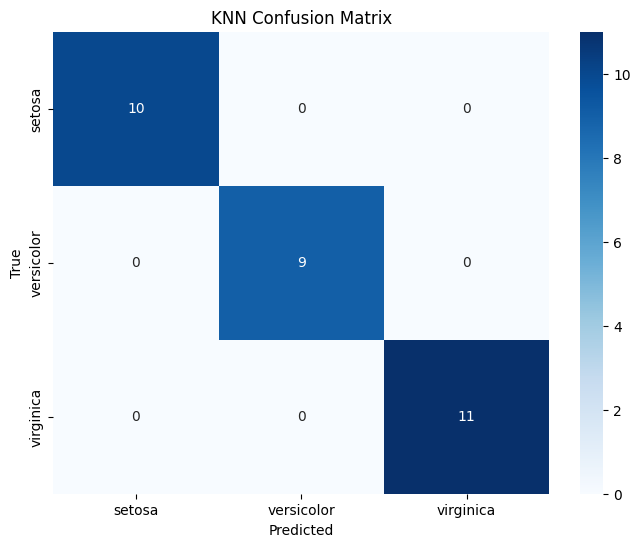

In [46]:
plot_confusion_matrix(y_test, y_pred_knn, 'KNN Confusion Matrix')

In [59]:
display_classification_report(y_test, y_pred_svm, 'SVM Classification Report')


SVM Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



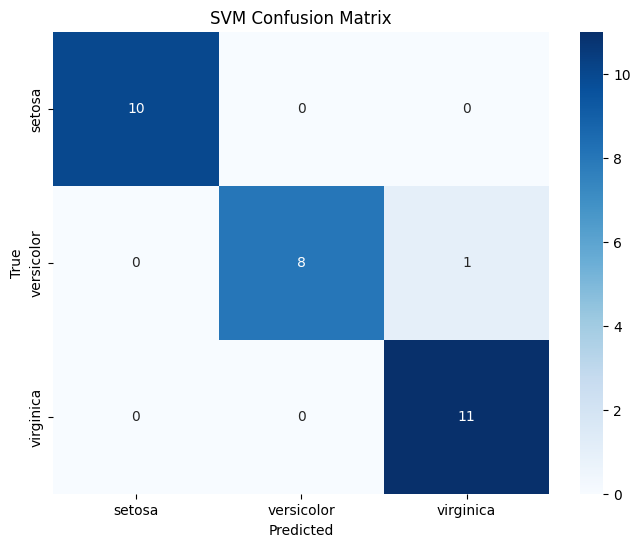

In [55]:
plot_confusion_matrix(y_test, y_pred_svm, 'SVM Confusion Matrix')

In [67]:
display_classification_report(y_test, y_pred_logreg, 'Logistic Regression Classification Report')


Logistic Regression Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



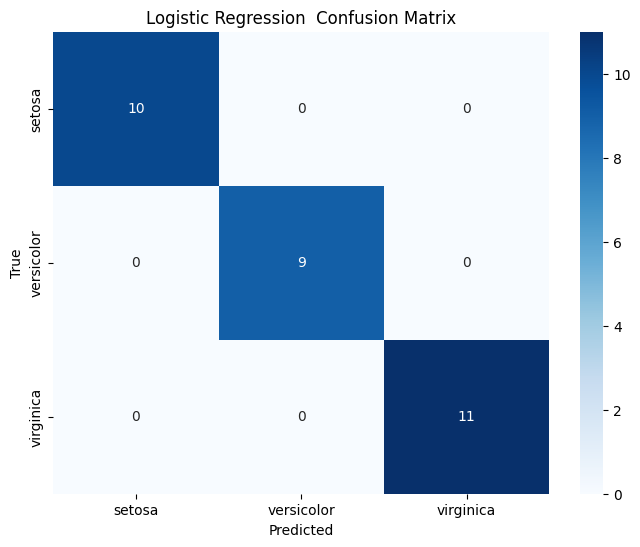

In [68]:
plot_confusion_matrix(y_test, y_pred_logreg, 'Logistic Regression  Confusion Matrix')

In [69]:
# Function to extract the accuracy from the classification report
def get_accuracy(y_true, y_pred):
  report = classification_report(y_true, y_pred, output_dict=True)
  return report['accuracy']

In [70]:
# Calculate the accuracy for each model
knn_accuracy = get_accuracy(y_test, y_pred_knn)
svm_accuracy = get_accuracy(y_test, y_pred_svm)
logreg_accuracy = get_accuracy(y_test, y_pred_logreg)

# Model names and their corresponding accuracies
models = ['KNN', 'SVM', 'Logistic Regression']
accuracies = [knn_accuracy, svm_accuracy, logreg_accuracy]

### **Key Observations:**
- **KNN** and **Logistic Regression** achieved **100% accuracy**, showing that they correctly classified all the test samples.
- **SVM**, while still performing very well with **97% accuracy**, showed slightly lower recall for the "Versicolor" class (0.89). This indicates that SVM might have struggled slightly more to classify this class correctly compared to KNN and Logistic Regression.



In [73]:
# New code for testing with custom inputs
def test_model_with_inputs(model, scaler):
    """
    Tests the given model with custom input values.

    Args:
        model: The trained model (KNN, SVM, or Logistic Regression).
        scaler: The StandardScaler used to scale the training data.
    """

    print("Enter the four feature values (sepal length, sepal width, petal length, petal width):")
    sepal_length = float(input("Sepal length: "))
    sepal_width = float(input("Sepal width: "))
    petal_length = float(input("Petal length: "))
    petal_width = float(input("Petal width: "))

    # Prepare the input data
    new_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

    # Scale the input data using the same scaler
    new_data_scaled = scaler.transform(new_data)

    # Make a prediction
    prediction = model.predict(new_data_scaled)
    predicted_class = iris.target_names[prediction[0]]

    print(f"Predicted class: {predicted_class}")

# Example usage for testing each model
print("\nTesting KNN Model:")
test_model_with_inputs(knn, scaler)

print("\nTesting SVM Model:")
test_model_with_inputs(svm, scaler)

print("\nTesting Logistic Regression Model:")
test_model_with_inputs(logreg, scaler)


Testing KNN Model:
Enter the four feature values (sepal length, sepal width, petal length, petal width):
Sepal length: 3
Sepal width: 4
Petal length: 5
Petal width: 9


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted class: virginica

Testing SVM Model:
Enter the four feature values (sepal length, sepal width, petal length, petal width):
Sepal length: 3
Sepal width: 4
Petal length: 5
Petal width: 9


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted class: virginica

Testing Logistic Regression Model:
Enter the four feature values (sepal length, sepal width, petal length, petal width):
Sepal length: 3
Sepal width: 4
Petal length: 5
Petal width: 9
Predicted class: virginica


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## **6. Conclusion**
- **KNN** and **Logistic Regression** performed **perfectly**, achieving 100% classification accuracy across all classes.
- **SVM** performed slightly worse in terms of recall for the "Versicolor" class, but it still achieved a very high accuracy of 97%.
- Given the simplicity and small size of the Iris dataset, all three models performed excellently, but **KNN** and **Logistic Regression** stood out with perfect accuracy.

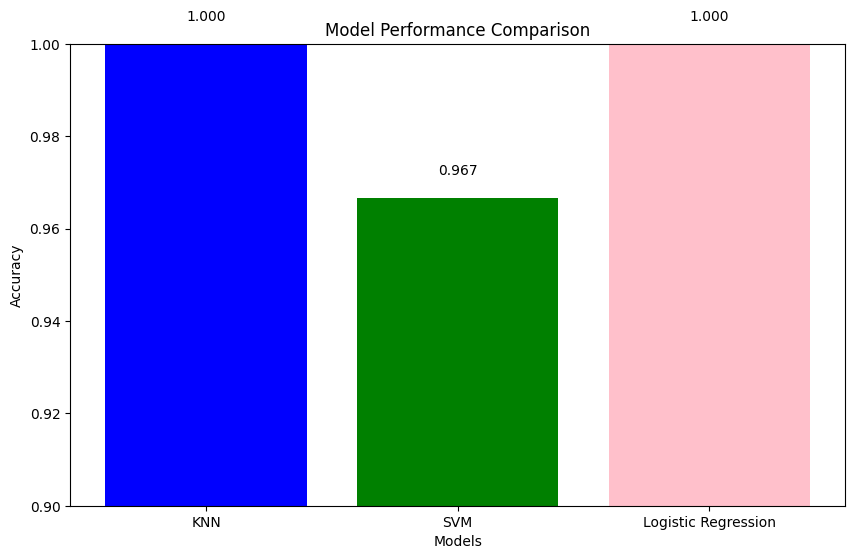

In [72]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'pink'])
plt.ylim([0.9,1.0])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')

# Adding the accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
  plt.text(i, accuracy + 0.005, f'{accuracy:.3f}', ha='center')

plt.show()

In [75]:
#saving all the Models
import joblib

# Save the models and scaler
joblib.dump(knn, 'iris_knn_model.pkl')
joblib.dump(svm, 'iris_svm_model.pkl')
joblib.dump(logreg, 'iris_logreg_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

## **7. Conclusion**
Thank you for reviewing this notebook on Iris Flower Classification using different machine learning models. I hope this analysis was insightful and helped you understand how different algorithms perform on a classification task. If you have any questions or suggestions, feel free to reach out!

You can explore my projects and stay updated on my work via the following links:

- **GitHub:** [Your GitHub Link](https://github.com/itzdineshx/Iris-flower-classification)
- **LinkedIn:** [Your LinkedIn Profile](https://www.linkedin.com/in/dinesh-x/)